In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties import umath

In [2]:
sns.set_theme(style="darkgrid")
sns.set_context("paper")

$\textbf{Messung der mittleren und momentanen Geschwindigkeit} \\$
Definitonen der Neigung und das Auslesen der Dateien

Nun nutze den Zusammenhang

$<v>=\sqrt{2aS} \frac{1}{2} \left(\sqrt{1+\frac{D}{2S}} + \sqrt{1-\frac{D}{2S}} \right)$

wobei der Term $\sqrt{2aS}$ der momentanen Geschwindigkeit entspricht.

C:\Users\andri\AppData\Local\Temp\ipykernel_13844\3373705174.py:48: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(a-beta_m)*S.n)*(np.sqrt(1+d2**(1/2)/(2*S.n)) + np.sqrt(1-d2**(1/2)/(2*S.n)))/2


Beschleunigung a: 0.07469+/-0.00011 m/s^2


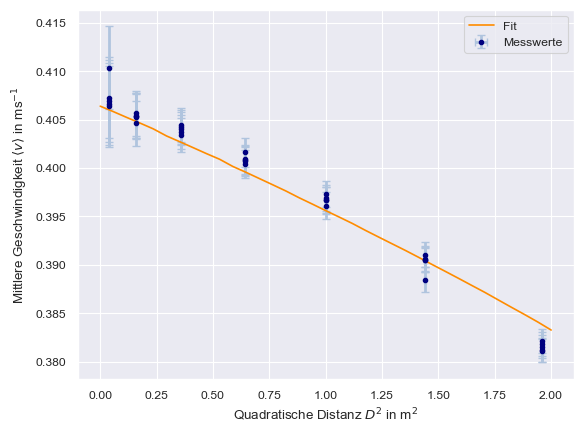

In [39]:
met1_data=pd.read_csv("TwoGatesErdbeschleunigung.csv")

#Distanzen und Zeiten
D=[]
t=met1_data["t/s"]
for i in range(len(met1_data["Nr."])):
    D.append(ufloat(met1_data["D/cm"][i], met1_data["D_err/cm"][i]))
D=np.array(D)/100 #Umwandlung in meter

#Berechnung der mittleren Geschwindigkeit mit Unsicherheit aufgrund der Distanz
v=[]
for i in range(len(met1_data["Nr."])):
    v.append(D[i]/t[i])
v=np.array(v)
v=v*0.995 #Berücksichtigung der statistischen Erhöhung der Messwerte um 1-2%

#definiere die Neigung, Start-/Mittelposition und die Masse
d=ufloat(0.93375, 0.00395) #Dicke vom Klotz
distance_stands=ufloat(102.4, 0.14)
angle=umath.atan(d/distance_stands)
mass=ufloat(0.296, 0.001) #kg
x0=ufloat(0.015, 0.0014) #Startposition in m
x1=ufloat(1.15, 0.0014) #Mittelposition in m
S=x1-x0 #Abstand zwischen den Positionen

#Definition von D Quadrat aufgrund der folgenden Plots
D2=[]
for i in range(len(D)):
    D2.append(D[i]*D[i])
D2=np.array(D2)

#spezielle Definiton für die Unsicherheit der Geschwindigkeit, dadurch komplette Unsicherheit
v_err=[]
for i in range(len(v)):
    v_err.append(np.sqrt((v[i].s)**2 + 0.001**2 + (3e-3*(v[i].n)**2)**2))
v_err=np.array(v_err)

#Plots    
plt.errorbar(x = [D2[i].n for i in range(len(D2))], xerr = [D2[i].s for i in range(len(D2))], y = [v[i].n for i in range(len(v))], yerr = v_err,
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Messwerte")
plt.xlabel(r"Quadratische Distanz $D^2$ in m$^2$")
plt.ylabel(r"Mittlere Geschwindigkeit $\langle v \rangle$ in ms$^{-1}$")

#Fitten
from scipy.optimize import curve_fit
beta_m=1.5/296*np.array([v[i].n for i in range(len(v))]) #Berücksichtigung der Reibung
def Function1(d2, a):
    return np.sqrt(2*(a-beta_m)*S.n)*(np.sqrt(1+d2**(1/2)/(2*S.n)) + np.sqrt(1-d2**(1/2)/(2*S.n)))/2

popt, pcov = curve_fit(Function1, [D2[i].n for i in range(len(D2))], [v[i].n for i in range(len(v))], sigma=v_err)
a1=ufloat(popt[0], np.sqrt(pcov))
print("Beschleunigung a: " + str(a1) + " m/s^2")
#Sehr gute Übereinstimmung unter annahme der Kleinwinkelnäherung
plt.plot(np.linspace(0, 2, 35), Function1(np.linspace(0, 2, 35), popt[0]), color="darkorange", label="Fit")
plt.legend()
plt.savefig("Mittlere_v_von_Q2.png", dpi=500, bbox_inches="tight")
plt.show()


In [38]:
print(umath.sqrt(2*a1*S))

0.4118+/-0.0005


$\textbf{Alternative Methode zur Messung der Beschleunigung} \\$
Wir messen die Geschwindigkeit an zwei verschiedenen Orten durch Verwendung des Collision Modes.

$a=\frac{v_1^2-v_2^2}{2(x_1-x_2)}$


In [42]:
met2_data=pd.read_csv("AltMethod_Speed+Collision.csv")
factor=0.995
distance=ufloat(0.2, 0.002) #m
v1=[]
for  i in range(10):
    v1.append(ufloat(met2_data["v1/cm/s"][i]*factor, np.sqrt(0.001**2+(met2_data["v1/cm/s"][i]*factor)**2*(3e-3)**2)))
v1=np.array(v1)/100 #m/s
v2=[]
for  i in range(10):
    v2.append(ufloat(met2_data["v2/cm/s"][i]*factor, np.sqrt(0.001**2+(met2_data["v2/cm/s"][i]*factor)**2*(3e-3)**2)))
v2=np.array(v2)/100 #m/s
a=(v1**2-v2**2)/(2*distance)
a2=a.mean()
print("Mittelwert der Beschleunigung a: " + str(a2) + " m/s^2")

Mittelwert der Beschleunigung a: -0.0888+/-0.0012 m/s^2


In [43]:
a1/a2

-0.8409799311791066+/-0.011297695520717937

$\textbf{4.4 Bestimmung der Erdbeschleunigung}$
Mit den zuvor berechneten Werten für die Beschleunigungen:

$a_1=0.07469+/-0.00011 m/s^2$ 
und

$a_2=-0.0888+/-0.0012 m/s$

In [25]:
g1=a1/umath.sin(angle) *(-1) #Korrektur Vorzeichen von der Beschleunigung als Betrag
print(g1)
g2=a2/umath.sin(angle)
print(g2)

-8.19+/-0.04
-9.74+/-0.14


$\textbf{4.5 Impuls- und Energieerhaltung bei elastischen und inelastischen Stößen}$

Nahezu elastischer Stoß gleicher Massen.

Achte darauf, dass die positive Richtung nach rechts definiert ist.

In [27]:
m1=ufloat(0.207, 0.001) #kg, mit Gummiband-Puffer
m2=ufloat(0.206, 0.001) #kg, mit der Stoßplatte
mes3_data=pd.read_csv("EPErhaltung_gleicherMassen.csv")
#Definition der Daten, mit den Fehlern für die Geschwindigkeiten
distance=ufloat(0.4, 0.0014)
factor=0.995
v1=[]
for  i in range(5):
    v1.append(ufloat(mes3_data["v1"][i]*factor, np.sqrt(0.001**2+(mes3_data["v1"][i]*factor)**2*(3e-3)**2)))
v1=np.array(v1)/100 #m/s
v2=[]
for  i in range(5):
    v2.append(ufloat(mes3_data["v2"][i]*factor, np.sqrt(0.001**2+(mes3_data["v2"][i]*factor)**2*(3e-3)**2)))
v2=-np.array(v2)/100 #m/s
v1_prime=[]
for  i in range(5):
    v1_prime.append(ufloat(mes3_data["v1'"][i]*factor, np.sqrt(0.001**2+(mes3_data["v1'"][i]*factor)**2*(3e-3)**2)))
v1_prime=-np.array(v1_prime)/100 #m/s
v2_prime=[]
for  i in range(5):
    v2_prime.append(ufloat(mes3_data["v2'"][i]*factor, np.sqrt(0.001**2+(mes3_data["v2'"][i]*factor)**2*(3e-3)**2)))
v2_prime=np.array(v2_prime)/100 #m/s

v_sp=(m1*v1+m2*v2)/(m1+m2)
v_sp_prime=(m1*v1_prime+m2*v2_prime)/(m1+m2)
v_rel=v1-v2
v_rel_prime=v1_prime-v2_prime
delta_v_sp=v_sp_prime-v_sp

#Elastizitätsparameter eta
eta=v_rel_prime**2/v_rel**2
print('elastisch gleiche Massen, param')
print(eta)

elastisch gleiche Massen, param
[0.8889795918367353+/-0.005334657265430299
 0.8999796381862325+/-0.005847392848884694
 0.8847171845897464+/-0.00534524422465131
 0.7733390570945183+/-0.005444551940443621
 0.8408215588849066+/-0.005047041395985706]


Nahezu elastischer Stoß ungleicher Massen. Der gleiche Vorgang wie in der vorigen Aufgabe, nur mit anderer Masse.

In [28]:
m1=ufloat(0.407, 0.001)
mes4_data=pd.read_csv("EPErhaltung_ungleicherMassen.csv")
distance=ufloat(0.4, 0.0014)
factor=0.995
v1=[]
for  i in range(5):
    v1.append(ufloat(mes4_data["v1"][i]*factor, np.sqrt(0.001**2+(mes4_data["v1"][i]*factor)**2*(3e-3)**2)))
v1=np.array(v1)/100 #m/s
v2=[]
for  i in range(5):
    v2.append(ufloat(mes4_data["v2"][i]*factor, np.sqrt(0.001**2+(mes4_data["v2"][i]*factor)**2*(3e-3)**2)))
v2=-np.array(v2)/100 #m/s
v1_prime=[]
for  i in range(5):
    v1_prime.append(ufloat(mes4_data["v1'"][i]*factor, np.sqrt(0.001**2+(mes4_data["v1'"][i]*factor)**2*(3e-3)**2)))
v1_prime=-np.array(v1_prime)/100 #m/s
v2_prime=[]
for  i in range(5):
    v2_prime.append(ufloat(mes4_data["v2'"][i]*factor, np.sqrt(0.001**2+(mes4_data["v2'"][i]*factor)**2*(3e-3)**2)))
v2_prime=np.array(v2_prime)/100 #m/s

v_sp=(m1*v1+m2*v2)/(m1+m2)
v_sp_prime=(m1*v1_prime+m2*v2_prime)/(m1+m2)
v_rel=v1-v2
v_rel_prime=v1_prime-v2_prime
delta_v_sp=v_sp_prime-v_sp

#Elastizitätsparameter eta
eta=v_rel_prime**2/v_rel**2
print('elastisch ungleiche Massen, param')
print(eta)

elastisch ungleiche Massen, param
[0.8846165084002924+/-0.005692248906974772
 0.9134622914871955+/-0.006141885987317306
 0.8434471395205243+/-0.0053997631766254765
 0.8862318245003412+/-0.0056243781946127055
 0.8724476833904174+/-0.005800465430778492]


Vollständig inelastischer Stoß.

In [29]:
m1=ufloat(0.206, 0.001) #kg, mit dem Wachsröhrchen
m2=ufloat(0.205, 0.001) #kg, mit dem Nadelaufsatz
mes5_data=pd.read_csv("EPErhaltung_inelStoss.csv")
distance=ufloat(0.4, 0.0014)
factor=0.995
v1=[]
for  i in range(5):
    v1.append(ufloat(mes5_data["v1"][i]*factor, np.sqrt(0.001**2+(mes5_data["v1"][i]*factor)**2*(3e-3)**2)))
v1=np.array(v1)/100 #m/s
v2=[]
for  i in range(5):
    v2.append(ufloat(mes5_data["v2"][i]*factor, np.sqrt(0.001**2+(mes5_data["v2"][i]*factor)**2*(3e-3)**2)))
v2=np.array(v2)/100 #m/s
v_ges=[]
for  i in range(5):
    v_ges.append(ufloat(mes5_data["v_ges"][i]*factor, np.sqrt(0.001**2+(mes5_data["v_ges"][i]*factor)**2*(3e-3)**2)))
v_ges=np.array(v_ges)/100 #m/s
v_sp=(m1*v1+m2*v2)/(m1+m2)
v_sp*100/v_ges

array([80.5827547326568+/-3.9054827467030195,
       102.52156602521563+/-1.024867220022272,
       82.0472714633298+/-3.1398771008496356,
       99.71794752584191+/-0.8193637673016522,
       97.36815050889278+/-0.9335836208546137], dtype=object)